0       0
1       0
2       0
3       0
4       0
       ..
3459    5
3460    5
3461    5
3462    5
3463    5
Name: class, Length: 3464, dtype: int64
21


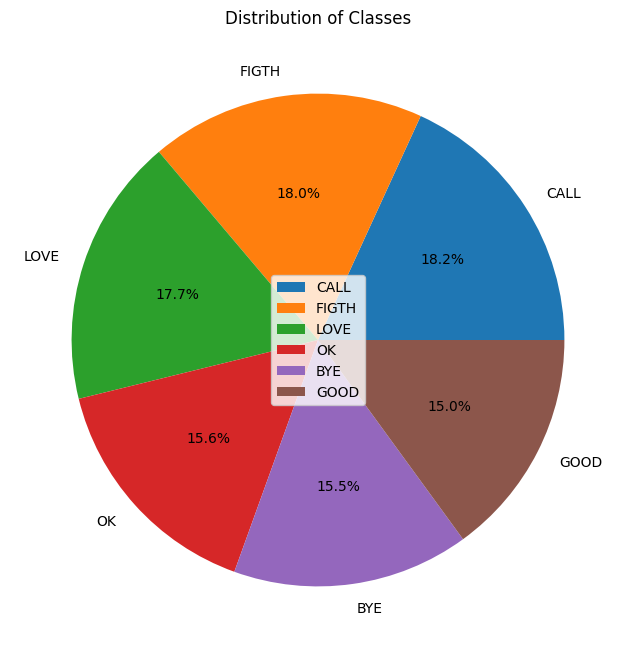

In [45]:
import pandas as pd
import numpy as np
import torch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
# Load the CSV data into a Pandas DataFrame
import matplotlib.pyplot as plt
# import tensorflow as tf
import os 
import cv2
import numpy as np
import tensorflow as tf


# Read the CSV file
data = pd.read_csv('/home/hankla/Desktop/work/clas_hands/train/data_landmark_hands.csv')

# Extract the 'class' column as the target variable
clas = data['class']
print(clas)

# Extract the landmark columns as features
data_input = np.array([[data[f'Landmark_{i}'][x] for i in range(21)] for x in range(len(data['Landmark_0']))])
print(len(data_input[0]))
# Map target labels to one-hot encoding
target_labels = {i: np.eye(6)[i] for i in range(6)}
target = np.array([target_labels[label] for label in clas])


class_counts = data['class'].value_counts()

# Map target labels to class names
class_names = {0: 'BYE', 1: 'GOOD', 2: 'FIGTH', 3: 'OK', 4: 'LOVE', 5: 'CALL'}

# Plotting a pie chart with class names
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=[class_names[i] for i in class_counts.index], autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.legend(loc='center')
plt.show()


In [46]:
for x in range(data_input.shape[0]):
    print(target[x])

[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]


In [47]:
data_input[0]

array([0.47524834, 0.47704187, 0.44040161, 0.3974902 , 0.36659458,
       0.3208417 , 0.25501546, 0.21356747, 0.17743809, 0.29725599,
       0.21703467, 0.16942845, 0.13172312, 0.29154172, 0.21374556,
       0.16705008, 0.12677318, 0.30056822, 0.24257846, 0.2043478 ,
       0.16908261])

In [48]:
class SimpleNN(torch.nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        hidden_size1 = 64
        hidden_size2 = 32
        output_size = 6

        self.fc1 = torch.nn.Linear(input_size, hidden_size1)
        self.fc2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = torch.nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [56]:

# Convert NumPy arrays to PyTorch tensors
data_input = torch.tensor(data_input, dtype=torch.float32)
target = torch.tensor(target, dtype=torch.float32)

# Define your neural network
input_size = data_input.shape[1]  # Adjust based on your actual input size
model = SimpleNN(input_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For classification tasks
optimizer = optim.Adam(model.parameters())  # Adjust the learning rate as needed

# Create a TensorDataset and a DataLoader
dataset = TensorDataset(data_input, target)
batch_size = 6
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 500  # Adjust the number of epochs as needed

for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels.argmax(dim=1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss after each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Now your model is trained, and you can use it for predictions.
# torch.save(model.state_dict(), 'model_weights.pth')

/tmp/ipykernel_239916/2028150995.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_input = torch.tensor(data_input, dtype=torch.float32)
/tmp/ipykernel_239916/2028150995.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target, dtype=torch.long)  # Assuming target is integer labels


RuntimeError: Expected floating point type for target with class probabilities, got Long

/tmp/ipykernel_239916/2605653963.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train)
/tmp/ipykernel_239916/2605653963.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train)  # For CrossEntropyLoss, target should be of type long
/tmp/ipykernel_239916/2605653963.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test)
/tmp/ipykernel_239916/2605653963.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach()

RuntimeError: Expected floating point type for target with class probabilities, got Long

In [14]:
# Assuming you have new_data_input as the new data for prediction
new_data_input = torch.tensor(data_input, dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    probabilities = model(new_data_input)
    
    
probabilities = torch.nn.functional.softmax(probabilities, dim=1)
# Get the predicted class for each sample
predicted_classes = torch.argmax(probabilities, dim=1).numpy()

# Now, predicted_classes contains the predicted class for each sample in new_data_input
print(predicted_classes)


[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 4 4 4 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5
 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\HP\AppData\Local\Temp\ipykernel_16668\1676347362.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_data_input = torch.tensor(data_input, dtype=torch.float32)


In [ ]:
def getmodel(inputs, numClass):
    x = tf.keras.layers.Dense(64,activation = 'relu')(inputs)
    x = tf.keras.layers.Dense(32,activation = 'relu')(x)
    x = tf.keras.layers.Dense(6,activation = 'softmax')(x)
    
    return x

In [ ]:
inputs = tf.keras.Input(shape = (21,))
outputs_model = getmodel(inputs, 6)
model = tf.keras.Model(inputs, outputs_model)
model.summary()




In [ ]:
model.compile(optimizer = 'adam', loss='CategoricalCrossentropy'
              ,metrics=['accuracy'])


In [ ]:
history = model.fit(x = data_input,
                    y = target, epochs = 1000)

In [ ]:
test = model.predict(data_input)
labelname = ['bye','good','fight','ok','love','call']

In [ ]:
for x in range(data_input.shape[0]):
    pre = np.argmax(test[x])
    name = labelname[pre]
    print(x,name)

In [ ]:


name = labelname[pre]

In [ ]:
data_input.shape[0]